In [1]:
import mediapipe as mp
import cv2
import pandas as pd
import numpy as np
import csv
import os

from app.core.PoseHelper import PoseHelper
import time

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=False, min_detection_confidence=0.2, model_complexity=2
)

In [3]:
import os

poses = []
names = []
images = []
print(os.getcwd())
for pose_name in os.listdir("app\\data\\suryanamaskarsteps\\"):
        names.append(pose_name)
names.sort()
for i in range(len(names)):
        pose_dir_path = os.path.join("app\\data\\suryanamaskarsteps\\", names[i])
        step = PoseHelper(pose_dir_path,mp_pose=mp_pose,pose=pose,mp_drawing=mp_drawing)
        step.detect_keypoints(verbose=False)
        step.calculate_angles()
        poses.append(step)

        images.append(cv2.imread(pose_dir_path))
print(names)

c:\Projects\YogaPoseHelper
['01.pranamasana.jpg', '02.hastauttasana.jpg', '03.padasana.jpg', '04.ashwasanchalanasana.jpg', '05.chaturangadandasana.jpg', '06.astanganamaskara.jpg', '07.bhujangasana.jpg', '08.parvatasana.jpg', '09.ashwasanchalanasana.jpg', '10.padasana.jpg', '11.hastauttasana.jpg', '12.pranamasana.jpg']


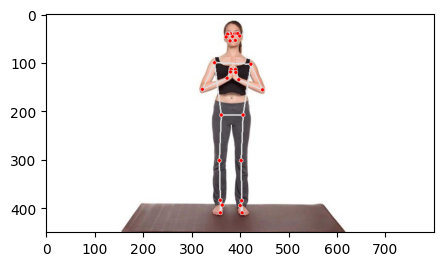

In [9]:
pose_index = 0 # next pose index
ideal = poses[pose_index]
ideal_arms_and_angles = ideal.arms_and_angles
pose_name = names[pose_index]
ideal.plot_keypoints2d()

In [13]:
import pyttsx3

def speak_text(text: str):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()
    return engine


In [6]:
# from playsound import playsound
# playsound("C:\\Projects\\YogaPoseHelper\\app\\media\\sound\\beep.mp3")
speak_text("hello")

In [18]:
speak_text("pranamasana")


Exception ignored in: <function BSTR.__del__ at 0x000002492EF1CEE0>
Traceback (most recent call last):
  File "c:\Projects\YogaPoseHelper\.venv\lib\site-packages\comtypes\__init__.py", line 699, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 


In [19]:
from app.core.graphics.graphics_assistant import draw_error_landmarks_2d

cap = cv2.VideoCapture(0)

n = len(poses)
start_time = time.time() - 6
pose_index = -1
engine = None
while cap.isOpened():
    success, frame = cap.read()
    end_time = time.time()
    # if end_time - start_time >= 6:
    #     pose_index += 1
    #     start_time = end_time
    #     ideal = poses[pose_index%n]
    #     ideal_arms_and_angles = ideal.arms_and_angles
    #     pose_name = names[pose_index%n]
    #     #playsound("app/media/sound/beep.mp3")
    #     #engine = speak_text(pose_name.split(".")[1])

    if success:
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = pose.process(img)

        if results.pose_landmarks:

            # 
            helper = PoseHelper(img=img,mp_pose=mp_pose,pose=pose,mp_drawing=mp_drawing)
            helper.detect_keypoints(verbose=False)
            helper.calculate_angles()
            arms_and_angles = helper.arms_and_angles
            # draw the landmarks
            draw_error_landmarks_2d(
                arms_and_angles=arms_and_angles,
                ideal_arms_and_angles=ideal_arms_and_angles,
                img=img,
                landmark_list=results.pose_landmarks,
                pronounce_error_by=5,
                connections=mp_pose.POSE_CONNECTIONS,
                verbose=False
            )

            # make the final image equal to the image we drew on
            frame = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    cv2.putText(frame, pose_name, (5, 20), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow("webcam feed", frame)
    

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
        

cap.release()
cv2.destroyAllWindows()